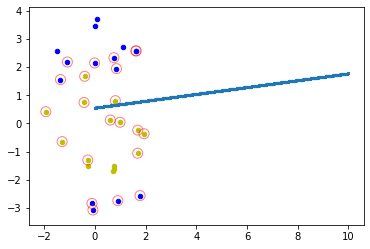

In [10]:
#分别生成第一类，第二类，第三类数据点，使用SVM对其进行分类
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split

def mock_data(point_count=3, point_type=1):
    points = []
    labels = []
    #point_type=1，生成的数据在平面上线性可分
    if point_type == 1:
        return [[1, 3], [2, 2.5], [3.5, 1]], [0, 0, 1]
    #point_type=2，生成的数据基本线性可分，但是存在少许噪音
    elif point_type == 2:
        for i in range(point_count // 2):
            point_x = random.uniform(0, 10)
            point_y = random.uniform(point_x+1, 10)
            points.append([point_x, point_y])
            labels.append(0)
        for i in range(point_count // 2):
            point_y = random.uniform(0, 10)
            point_x = random.uniform(point_y+1, 10)
            points.append([point_x, point_y])
            labels.append(1)
        for i in range(point_count // 6):
            point_y = random.uniform(0, 10)
            point_x = random.uniform(0, 10)
            points.append([point_x, point_y])
            labels.append(random.choice([0, 1]))
    #point_type=3，生成无法线性可分的数据
    elif point_type == 3:
        for i in range(point_count // 2):
            point_x = random.uniform(-2, 2)
            point_y = random.uniform(-math.sqrt(4-point_x*point_x), math.sqrt(4-point_x*point_x))
            points.append([point_x, point_y])
            labels.append(0)
        for i in range(point_count // 2):
            point_x = random.uniform(-2, 2)
            point_y = random.choice([random.uniform(-4, -math.sqrt(4-point_x*point_x)), random.uniform(math.sqrt(4-point_x*point_x), 4)])
            points.append([point_x, point_y])
            labels.append(1)
    return points, labels
#绘制分类结果及超平面
def plot_point(dataArr, labelArr, Support_vector_index, W=0, b=0):
    for i in range(np.shape(dataArr)[0]):
        if labelArr[i] == 1:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='b', s=20)
        else:
            plt.scatter(dataArr[i][0], dataArr[i][1], c='y', s=20)
    for j in Support_vector_index:
        plt.scatter(dataArr[j][0], dataArr[j][1], s=100, c='',edgecolors='r',  marker='o', alpha=0.5, linewidths=1)
    x = np.arange(0, 10, 0.01)
    y = (W[0][0] * x + b)/(-1 * W[0][1])
    plt.scatter(x, y, s=5, marker='h')
    plt.show()
if __name__ == '__main__':
    #分别生成第一类，第二类，第三类数据
    #补充代码
    #dataArr, labelArr = mock_data(3, 1)
    #dataArr, labelArr = mock_data(30, 2)
    dataArr, labelArr = mock_data(30, 3)

    #定义SVM分类器，核函数定义为线性核函数，其他参数使用默认值
    #补充代码
    
    clf = SVC(kernel = 'linear')
    #fit训练数据
    clf.fit(dataArr, labelArr)
    #获取模型返回值
    n_Support_vector = clf.n_support_   #支持向量个数
    Support_vector_index = clf.support_ #支持向量索引
    W = clf.coef_   #方向向量
    b = clf.intercept_  #截距项b
    #绘制分类超平面
    plot_point(dataArr, labelArr, Support_vector_index, W, b)

In [4]:
from sklearn.metrics import accuracy_score
#修改mian函数，生成第三类数据点，并将数据集划分为训练集和测试集，训练集：测试集=8:2，计算在测试集上的准确率
dataArr, labelArr = mock_data(30, 3)
X_train, X_test, y_train, y_test = train_test_split(dataArr, labelArr, test_size=0.2, random_state=0)
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
#测试三组数据，并输出准确率
for i in range(3):
    dataArr, labelArr = mock_data(30, 3)
    X_train, X_test, y_train, y_test = train_test_split(dataArr, labelArr, test_size=0.2, random_state=i)
    clf = SVC(kernel = 'linear')
    clf.fit(X_train, y_train)
    print(accuracy_score(y_test, clf.predict(X_test)))

0.3333333333333333
0.8333333333333334
0.5
0.5


In [46]:
#将SVM的参数中的核函数修改为rbf，测试若干组数据，观察并分析准确率
for i in range(3):
    dataArr, labelArr = mock_data(30, 3)
    X_train, X_test, y_train, y_test = train_test_split(dataArr, labelArr, test_size=0.2, random_state=i)
    clf = SVC(kernel = 'rbf')
    clf.fit(X_train, y_train)
    print(accuracy_score(y_test, clf.predict(X_test)))

1.0
0.8333333333333334
1.0


In [7]:
from sklearn import datasets, metrics
import pandas as pd
from sklearn.model_selection import GridSearchCV

#对sklearn中的鸢尾花数据集使用SVM库进行分类
def prepare_data():
    iris = datasets.load_iris()
    X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
    y = pd.DataFrame(iris['target'])
    return X,y

X,y=prepare_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train.values.ravel())
print(accuracy_score(y_test, clf.predict(X_test)))


tree_param_grid = { 'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': [0.5, 0.6, 0.8, 1.0, 2.0]
                   ,'gamma': ['auto', 0.001]}
grid = GridSearchCV(SVC(max_iter = -1),param_grid=tree_param_grid, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_params_, grid.best_score_)
clf_best = grid.best_estimator_
print(accuracy_score(y_test, clf_best.predict(X_test)))

0.9666666666666667
{'C': 0.6, 'gamma': 'auto', 'kernel': 'linear'} 0.9833333333333333
1.0


In [9]:
#用SVM 实现MNIST手写数字图像识别，观察不同的参数对结果的影响并尝试尽可能提高准确率，并对实验结果进行对比分析。
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

mnist=load_digits()
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)
clf = SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

tree_param_grid = { 'kernel': ['rbf', 'linear', 'sigmoid', 'poly'], 'C': [0.5, 0.6, 0.8, 1.0, 2.0]
                   ,'gamma': ['auto', 0.001]}
grid = GridSearchCV(SVC(max_iter = -1),param_grid=tree_param_grid, scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)
print(grid.best_params_, grid.best_score_)
clf_best = grid.best_estimator_
print(accuracy_score(y_test, clf_best.predict(X_test)))

0.5351851851851852
{'C': 2.0, 'gamma': 0.001, 'kernel': 'rbf'} 0.9904534606205251
0.987037037037037
